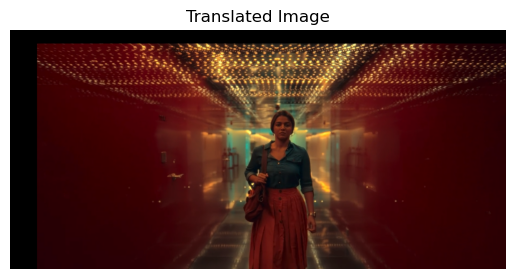

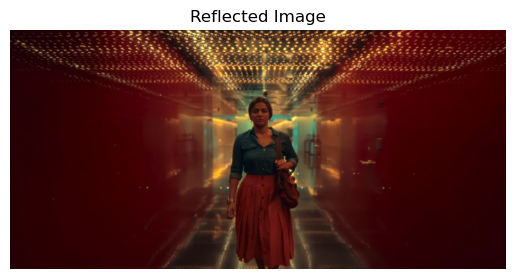

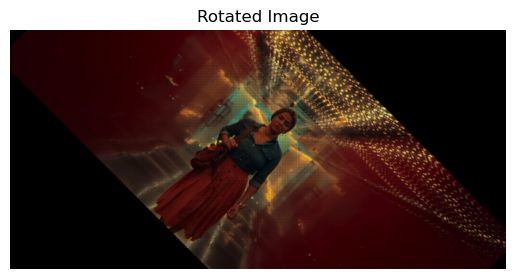

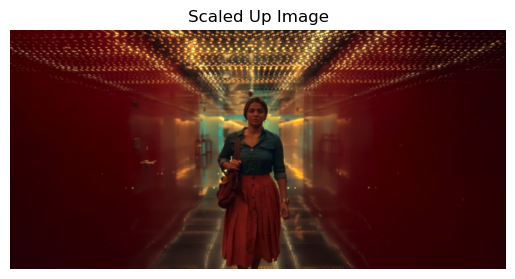

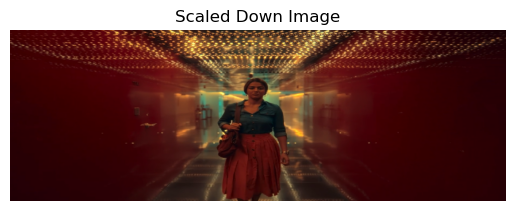

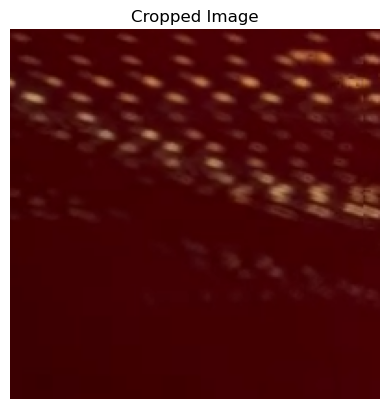

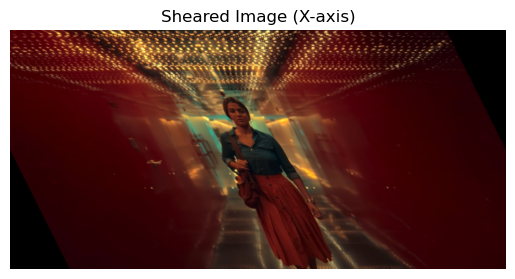

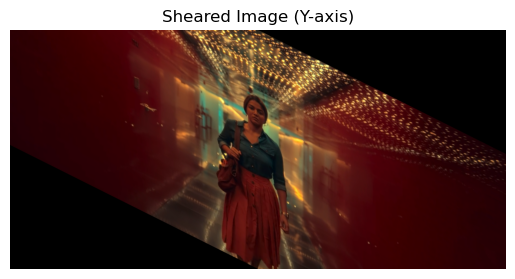

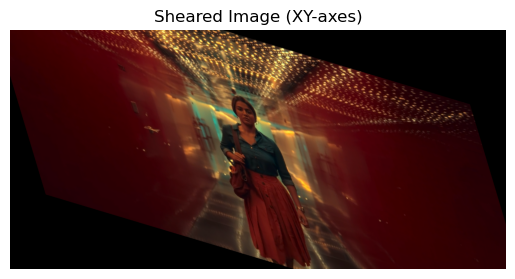

In [4]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

def display_image(img, title="Image"):
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.title(title)
    plt.axis('off')
    plt.show()

# Load an image
image = cv2.imread("C:/Users/Jagadeesh/Pictures/Screenshots/Screenshot 2025-02-12 211021.png")
height, width, channels = image.shape

# 1. Image Translation
def translate_image(image, tx, ty):
    translated = np.zeros_like(image)
    for i in range(height):
        for j in range(width):
            if 0 <= i + ty < height and 0 <= j + tx < width:
                translated[i + ty, j + tx] = image[i, j]
    return translated

# 2. Image Reflection
def reflect_image(image, axis=0):
    reflected = np.zeros_like(image)
    if axis == 0:
        for i in range(height):
            for j in range(width):
                reflected[height - 1 - i, j] = image[i, j]
    elif axis == 1:
        for i in range(height):
            for j in range(width):
                reflected[i, width - 1 - j] = image[i, j]
    else:
        for i in range(height):
            for j in range(width):
                reflected[height - 1 - i, width - 1 - j] = image[i, j]
    return reflected

# 3. Image Rotation
def rotate_image(image, angle):
    angle_rad = np.radians(angle)
    center_x, center_y = width // 2, height // 2
    rotated = np.zeros_like(image)
    
    for i in range(height):
        for j in range(width):
            x = j - center_x
            y = i - center_y
            new_x = int(np.round(center_x + x * np.cos(angle_rad) - y * np.sin(angle_rad)))
            new_y = int(np.round(center_y + x * np.sin(angle_rad) + y * np.cos(angle_rad)))
            
            if 0 <= new_x < width and 0 <= new_y < height:
                rotated[new_y, new_x] = image[i, j]
    
    return rotated

# 4. Image Scaling
def scale_image(image, scale_x, scale_y):
    new_width = int(width * scale_x)
    new_height = int(height * scale_y)
    scaled = np.zeros((new_height, new_width, channels), dtype=np.uint8)
    
    for i in range(new_height):
        for j in range(new_width):
            orig_x = int(j / scale_x)
            orig_y = int(i / scale_y)
            if orig_x < width and orig_y < height:
                scaled[i, j] = image[orig_y, orig_x]
    return scaled

# 5. Image Cropping
def crop_image(image, start_x, start_y, crop_width, crop_height):
    return image[start_y:start_y+crop_height, start_x:start_x+crop_width]

# 6. Shearing in x-axis
def shear_x(image, shear_factor):
    sheared = np.zeros_like(image)
    for i in range(height):
        for j in range(width):
            new_x = int(j + shear_factor * (i - height // 2))
            if 0 <= new_x < width:
                sheared[i, new_x] = image[i, j]
    return sheared

# 7. Shearing in y-axis
def shear_y(image, shear_factor):
    sheared = np.zeros_like(image)
    for i in range(height):
        for j in range(width):
            new_y = int(i + shear_factor * (j - width // 2))
            if 0 <= new_y < height:
                sheared[new_y, j] = image[i, j]
    return sheared

# 8. Shearing in both x and y axes
def shear_xy(image, shear_x_factor, shear_y_factor):
    sheared = np.zeros_like(image)
    for i in range(height):
        for j in range(width):
            new_x = int(j + shear_x_factor * (i - height // 2))
            new_y = int(i + shear_y_factor * (j - width // 2))
            if 0 <= new_x < width and 0 <= new_y < height:
                sheared[new_y, new_x] = image[i, j]
    return sheared

# Apply transformations
translated_image = translate_image(image, 100, 50)
reflected_image = reflect_image(image, 1)
rotated_image = rotate_image(image, 45)
scaledup_image = scale_image(image, 1.5, 1.5)
scaleddown_image = scale_image(image, 0.7, 0.5)
cropped_image = crop_image(image, 50, 50, 200, 200)
sheared_x_image = shear_x(image, 0.5)
sheared_y_image = shear_y(image, 0.5)
sheared_xy_image = shear_xy(image, 0.3, 0.3)

# Display transformed images
display_image(translated_image, "Translated Image")
display_image(reflected_image, "Reflected Image")
display_image(rotated_image, "Rotated Image")
display_image(scaledup_image, "Scaled Up Image")
display_image(scaleddown_image, "Scaled Down Image")
display_image(cropped_image, "Cropped Image")
display_image(sheared_x_image, "Sheared Image (X-axis)")
display_image(sheared_y_image, "Sheared Image (Y-axis)")
display_image(sheared_xy_image, "Sheared Image (XY-axes)")